In [2]:
from delphin.codecs import eds
from delphin.eds import *
import torch
import json
import sys, os

In [3]:
with open('input.txt', 'r') as f:
    test = f.read()


In [4]:
test_eds = eds.loads(test)

In [5]:
test = test_eds[0]

In [6]:
test.edges

[('_1', 'BV', 'x6'),
 ('e10', 'ARG1', 'x6'),
 ('e10', 'ARG2', 'x9'),
 ('_2', 'BV', 'x9'),
 ('e17', 'ARG1', 'e16'),
 ('e17', 'ARG2', 'x15'),
 ('_3', 'BV', 'x15'),
 ('e22', 'ARG1', 'x15'),
 ('e16', 'ARG1', 'x6'),
 ('e3', 'ARG1', 'x6'),
 ('e3', 'ARG2', 'x23'),
 ('_4', 'BV', 'x23'),
 ('e29', 'ARG1', 'e3'),
 ('e29', 'ARG2', 'x30'),
 ('_5', 'BV', 'x30'),
 ('e35', 'ARG1', 'x30'),
 ('e37', 'ARG1', 'e3'),
 ('e37', 'ARG2', 'x38'),
 ('_6', 'BV', 'x38'),
 ('e45', 'ARG1', 'x38'),
 ('e45', 'ARG2', 'x40'),
 ('_7', 'BV', 'x40')]

In [7]:
for node in test.nodes:
    print(node.predicate)

proper_q
compound
proper_q
named
named
measure
udef_q
card
_year_n_1
_old_a_1
_join_v_1
_the_q
_board_n_of
_as_p
_a_q
_nonexecutive/jj_u_unknown
_director_n_of
loc_nonsp
mofy
def_explicit_q
of_p
def_implicit_q
dofm


In [8]:
from annotation import *

alist = [line.rstrip() for line in open('1.2.2c.okay.txt')]

In [9]:
fn_source = alist[0]

In [10]:
SemLinkAnnotation(alist[0]).dependencies

['-----',
 '0:2-ARG0=Agent;Agent',
 '7:0-ARGM-MOD',
 '8:0-rel',
 '9:1-ARG1=Patient;Part_1',
 '11:1-ARGM-PRD',
 '15:1-ARGM-TMP']

In [11]:
fn_source = SemLinkAnnotation(fn_source)

In [12]:
fn_source.__dict__

{'dep': None,
 'source_file': 'wsj_0001.parse',
 'sentence_no': '0',
 'token_no': '8',
 'verb': 'join',
 'vn_class': '22.1-2-1',
 'fn_frame': 'Cause_to_amalgamate',
 'pb_roleset': 'join.01',
 'on_group': None,
 'dependencies': ['-----',
  '0:2-ARG0=Agent;Agent',
  '7:0-ARGM-MOD',
  '8:0-rel',
  '9:1-ARG1=Patient;Part_1',
  '11:1-ARGM-PRD',
  '15:1-ARGM-TMP'],
 'instance': 'wsj_0001.parse 0 8',
 'source': 'old sl',
 'input_line': 'nw/wsj/00/wsj_0001.parse 0 8 gold join-v 22.1-2-1 Cause_to_amalgamate join.01 null ----- 0:2-ARG0=Agent;Agent 7:0-ARGM-MOD 8:0-rel 9:1-ARG1=Patient;Part_1 11:1-ARGM-PRD 15:1-ARGM-TMP',
 'file_path': 'nw/wsj/00/wsj_0001.parse'}

In [7]:
from delphin.codecs.eds import loads

def get_file_name(semi:SemLinkAnnotation):
    file_index = semi.source_file.split('.')[0].split('_')[-1] #get file number
    sentence_index = str(int(semi.sentence_no) + 1)
    sentence_index = '0'*(3-len(sentence_index)) + sentence_index

    return '2' + file_index + sentence_index

def get_from_file(file):
    with open(file, 'r') as f:
        data = f.read()
    
    blocks = data.split('\n\n')
    eds_blocks = blocks[7] #manual index
    eds = loads(eds_blocks)[0]

    sentence_blocks = blocks[1]
    
    sentence_start = -1
    sentence_end = -1
    for idx in range(len(sentence_blocks)):
        if sentence_blocks[idx] == '`':
            sentence_start = idx
            break
    
    for idx in range(len(sentence_blocks)):
        if sentence_blocks[idx] == "'":
            sentence_end = idx

    print(sentence_start, sentence_end)
    return sentence_blocks[sentence_start+1:sentence_end], eds_blocks, eds

In [15]:
sent, eds_text, test_eds = get_from_file(get_file_name(fn_source))

24 109


In [16]:
def get_verb_nodes(eds:EDS):
    return [x for x in eds.nodes if '_v_' in x.predicate]

def get_node(eds:EDS, node_id):
    for x in eds.nodes:
        if x.id == node_id:
            return x
    raise Warning('No node has id {}'.format(node_id))

In [17]:
get_verb_nodes(test_eds)

[<Node object (e3:_join_v_1<34:38>[e]) at 1652564690528>]

In [18]:
from nltk.tokenize.treebank import *
from copy import deepcopy

tokenizer = TreebankWordTokenizer()
detokenizer = TreebankWordDetokenizer()
tokens = tokenizer.tokenize('A form of asbestos once used to make Kent cigarette filters has caused a high percentage of cancer deaths among a group of workers exposed to it more than 30 years ago, researchers reported.')

In [19]:
tokens

['A',
 'form',
 'of',
 'asbestos',
 'once',
 'used',
 'to',
 'make',
 'Kent',
 'cigarette',
 'filters',
 'has',
 'caused',
 'a',
 'high',
 'percentage',
 'of',
 'cancer',
 'deaths',
 'among',
 'a',
 'group',
 'of',
 'workers',
 'exposed',
 'to',
 'it',
 'more',
 'than',
 '30',
 'years',
 'ago',
 ',',
 'researchers',
 'reported',
 '.']

In [20]:
verb = get_verb_nodes(test_eds)[0]
start, end = verb.lnk.data

In [21]:
tokenizer.tokenize(sent[start:end])

['join']

In [22]:
verb.edges.keys()

dict_keys(['ARG1', 'ARG2'])

In [23]:
get_node(test_eds, 'x23')


<Node object (x23:_board_n_of<43:48>[x]) at 1652564690752>

In [24]:
sent[43:48]

'board'

In [30]:
sent

'Pierre Vinken, 61 years old, will join the board as a nonexecutive director Nov. 29.'

In [31]:
padding_token = '略'
len(padding_token)

1

In [32]:
def iterative_levenshtein(s, t, costs=(1, 1, 1)):
    """ 
        iterative_levenshtein(s, t) -> ldist
        ldist is the Levenshtein distance between the strings 
        s and t.
        For all i and j, dist[i,j] will contain the Levenshtein 
        distance between the first i characters of s and the 
        first j characters of t
        
        costs: a tuple or a list with three integers (d, i, s)
               where d defines the costs for a deletion
                     i defines the costs for an insertion and
                     s defines the costs for a substitution
    """

    rows = len(s)+1
    cols = len(t)+1
    deletes, inserts, substitutes = costs
    
    dist = [[0 for x in range(cols)] for x in range(rows)]

    # source prefixes can be transformed into empty strings 
    # by deletions:
    for row in range(1, rows):
        dist[row][0] = row * deletes

    # target prefixes can be created from an empty source string
    # by inserting the characters
    for col in range(1, cols):
        dist[0][col] = col * inserts
        
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0
            else:
                cost = substitutes
            dist[row][col] = min(dist[row-1][col] + deletes,
                                 dist[row][col-1] + inserts,
                                 dist[row-1][col-1] + cost) # substitution

    # for r in range(rows):
    #     print(dist[r])
    
    return dist[row][col]

In [27]:
from utils import *
from nltk.metrics.distance import edit_distance
def update_graph(sentence, eds:EDS, semlink:SemLinkAnnotation):
    tokens = tokenize(semlink)
    token_idx = int(semlink.token_no)
    target_verb = tokens[token_idx]
    begin_idx = len(detokenize(tokens[:token_idx]))
    end_idx = len(detokenize(tokens[:token_idx+1]))
    candidate_verb_nodes = get_verb_nodes(eds)
    
    source_verb_node = None
    #update predicate structure
    for verb_node in candidate_verb_nodes:
        s,e = verb_node.lnk.data
        # print(s,e)
        idx_pairs = sorted([(s,e), (begin_idx, end_idx)], key= lambda x : x[0])

        if idx_pairs[0][1] > idx_pairs[1][0]:
            #overlap confirmed
            source_verb_node = verb_node
    
    # print(begin_idx, end_idx)
    # print(source_verb_node)
    if source_verb_node == None:
        print(target_verb)
        print(sentence)
        raise Exception('empty verb???')
    updated_predicate = source_verb_node.predicate + '-fn.' + semlink.fn_frame

    #update edge roles
    target_dependencies = [x for x in semlink.dependencies if ';' in x]
    arg_assosicated_strings = get_children_strings(sentence, eds, source_verb_node)

    source_verb_edges_dict = deepcopy(source_verb_node.edges)
    for dependency in target_dependencies:
        token_intervals = dependency.split('-')[0].split('*')
        concate_string = ""
        for interval in token_intervals:
            start_token_idx = int(interval.split(':')[0])
            end_token_idx = start_token_idx + int(interval.split(':')[1]) + 1
            concate_string += detokenize(tokens[start_token_idx : end_token_idx])
        
        fn_role = dependency.split(';')[-1]

        target_child_node = None

        max_len = 0
        for key in arg_assosicated_strings:
            if len(arg_assosicated_strings[key]) > max_len:
                max_len = len(arg_assosicated_strings[key])
        
        for key in arg_assosicated_strings:
            arg_assosicated_strings[key] += '='*(max_len - len(arg_assosicated_strings[key]))

        edit_distances = sorted([(key, edit_distance(concate_string, arg_assosicated_strings[key])) for key in arg_assosicated_strings.keys()], key= lambda x : x[1])
        old_key = edit_distances[0][0]
        new_key = old_key + '-fn.' + fn_role
        arg_assosicated_strings.pop(old_key)
        source_verb_edges_dict[new_key] = source_verb_edges_dict.pop(old_key)
        print(new_key)
    
    return source_verb_node.id, updated_predicate, source_verb_edges_dict

In [34]:
import re
with open('20001001','r') as f:
    data = f.read().split('\n\n')
reg = r':.*?<' 
a = data[7].split('\n ')[11]
re.sub(reg, 'newtext', a)

'e3newtext34:38>{e SF prop, TENSE fut, MOOD indicative, PROG -, PERF -}[ARG1 x6, ARG2 x23]'

In [1]:
class sentence_eds():
    def __init__(self, filename):
        self.sentence, self.eds_text, self.eds = get_from_file(filename)
        self.predicate_reg = r':.*?<'
        self.edge_reg = r'\[.*?\]'
        self.filename = filename

    def update_text(self, id, new_predicate, new_edges):
        self.eds_lines = self.eds_text.split('\n ')
        for line_idx in range(len(self.eds_lines)):
            line = self.eds_lines[line_idx]
            if line[:len(id)] == id:
                update_predicate = re.sub(self.predicate_reg, ':' + new_predicate + '<', line)
                
                edges_strings = []
                for key in new_edges.keys():
                    edges_strings.append(key + ' ' + new_edges[key])
                update_edges = re.sub(self.edge_reg, '[' + ', '.join(edges_strings) + ']', update_predicate)

                self.eds_lines[line_idx] = update_edges

                self.eds_text = '\n '.join(self.eds_lines)
                self.eds = eds.loads(self.eds_text)[0]
                break
    
    def save_to_path(self, path=''):
        with open(os.path.join(path, self.filename + '_projected'), 'w') as f:
            f.write(self.eds_text)

In [20]:
sent, eds_block, eds = get_from_file('deepbank_raw/20003003')
semlink = SemLinkAnnotation('nw/wsj/00/wsj_0003.parse 2 14 gold make-v 26.1-1 Manufacturing make.01 null ----- 3:2*12:1*13:1-ARG0=Agent;Manufacturer 14:0-rel 15:1-ARG1=Product;Product 3:2*12:1-LINK-SLC ')

In [28]:
update_graph(sent, eds, semlink)

ARG1-fn.Manufacturer
ARG2-fn.Product


('e49',
 '_make_v_1-fn.Manufacturing',
 {'ARG1-fn.Manufacturer': 'x5', 'ARG2-fn.Product': 'x50'})

In [31]:
get_node(eds, 'x50')

<Node object (x50:_cigarette_n_1<71:82>[x]) at 2338670611584>

In [30]:
sent

'Lorillard Inc., the unit of New York-based Loews Corp. that makes Kent cigarettes, stopped using crocidolite in its Micronite cigarette filters in 1956.'

In [10]:
from copy import deepcopy

In [39]:
new_id, new_pred, new_edges = update_graph(sent, deepcopy(test_eds), fn_source)

34 38
33 38
<Node object (e3:_join_v_1<34:38>[e]) at 1652592547872>
0:2-ARG0=Agent;Agent
7 14
0 14
ARG1-fn.Agent
9:1-ARG1=Patient;Part_1
43 48
38 48
ARG2-fn.Part_1


In [40]:
test_sent_eds.update_text(new_id, new_pred, new_edges)
test_sent_eds.eds_text

'{e3:\n _1:proper_q<0:28>[BV x6]\n e10:compound<0:14>{e SF prop, TENSE untensed, MOOD indicative, PROG -, PERF -}[ARG1 x6, ARG2 x9]\n _2:proper_q<0:6>[BV x9]\n x9:named<0:6>("Pierre"){x PERS 3, NUM sg, IND +}[]\n x6:named<7:14>("Vinken"){x PERS 3, NUM sg, IND +}[]\n e17:measure<15:23>{e SF prop, TENSE untensed, MOOD indicative, PROG -, PERF -}[ARG1 e16, ARG2 x15]\n _3:udef_q<15:23>[BV x15]\n e22:card<15:17>("61"){e SF prop, TENSE untensed, MOOD indicative, PROG -, PERF -}[ARG1 x15]\n x15:_year_n_1<18:23>{x PERS 3, NUM pl, IND +}[]\n e16:_old_a_1<24:28>{e SF prop, TENSE untensed, MOOD indicative, PROG -, PERF -}[ARG1 x6]\n e3:_join_v_1-fn.Cause_to_amalgamate<34:38>{e SF prop, TENSE fut, MOOD indicative, PROG -, PERF -}[ARG1-fn.Agent x6, ARG2-fn.Part_1 x23]\n _4:_the_q<39:42>[BV x23]\n x23:_board_n_of<43:48>{x PERS 3, NUM sg}[]\n e29:_as_p<49:51>{e SF prop, TENSE untensed, MOOD indicative, PROG -, PERF -}[ARG1 e3, ARG2 x30]\n _5:_a_q<52:53>[BV x30]\n e35:_nonexecutive/jj_u_unknown<54:66>

In [43]:
import graphviz
def eds2graph(eds:EDS):
    g = graphviz.Digraph()
    for node in eds.nodes:
        if '-fn.' in node.predicate:
            g.node(node.id, label=node.predicate, color = 'red', fontcolor = 'red')
        else:
            g.node(node.id, label=node.predicate)
        for key in node.edges:
            if '-FN.' in key:
                g.edge(node.id, node.edges[key], label=key, color ='blue', fontcolor = 'blue')
            else:
                g.edge(node.id, node.edges[key], label=key)
        
    return g

In [44]:
g1 = eds2graph(test_eds)

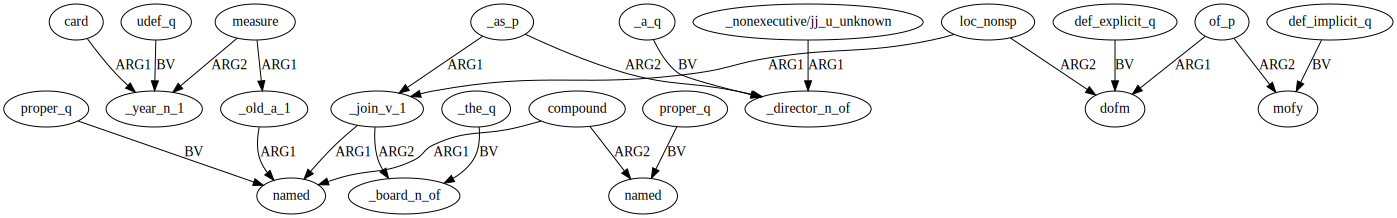

In [45]:
display(g1)

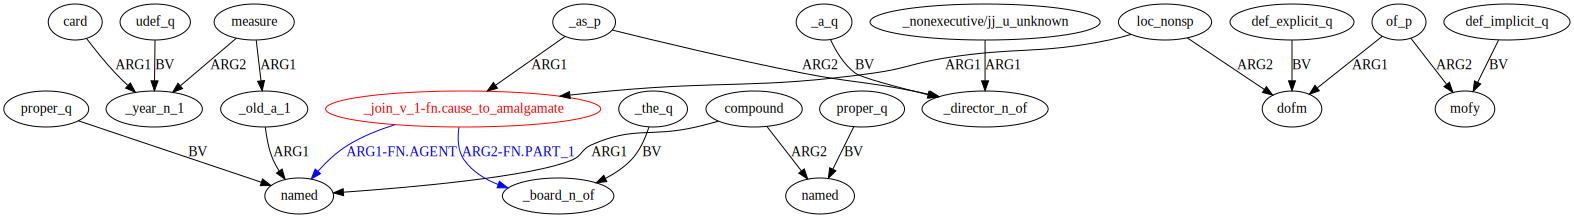

In [46]:
g2 = eds2graph(test_sent_eds.eds)
display(g2)

In [49]:
from nltk.tree import Tree
def get_parse_from_file(filename, idx):
    with open(filename, 'r') as f:
        parses = f.read().split('\n\n')
    
    return parses[idx]

In [50]:
t = get_parse_from_file('nw/wsj/00/wsj_0003.parse', 1)

In [51]:
tree = Tree.fromstring(t)

In [83]:
tree.leaves()[0:4] + tree.leaves()[33:35]

['The', 'asbestos', 'fiber', ',', '*T*-2', '.']

In [56]:
ts, tet, te = get_from_file('deepbank_raw/20003002')

24 201


In [95]:
def get_children_strings(sentence, eds, node):
    arg_str_dict = {}
    for key in node.edges.keys():
        arg_str_dict[key] = ""

    for key in node.edges.keys():
        batch = [get_node(eds, node.edges[key])]
        index_tuples = [get_node(eds, node.edges[key]).lnk.data]
        children_string = ""

        while batch != []:
            new_batch = []
            for c in batch:
                # print(c.predicate)
                # print(c.edges)
                for c_key in c.edges.keys():
                    # print(c_key)
                    # print(c.edges[key])
                    new_batch.append(get_node(eds, c.edges[c_key]))
                    #collect all children nodes
            #print(new_batch)
            for c in new_batch:
                new_node = c
                index_tuples.append(new_node.lnk.data)
            batch = new_batch
    
        index_tuples = sorted([(int(i), int(j)) for (i,j) in index_tuples], key=lambda x : x[0])
        for (i,j) in index_tuples:
            children_string += sentence[i:j]

        arg_str_dict[key] = children_string
    
    return arg_str_dict

In [69]:
te

<EDS object (focus_d appos _the_q compound udef_q _asbestos_n_1 _fiber_n_1 udef_q _crocidolite/nn_u_unknown _unusually_x_deg _resilient/jj_u_unknown _once_x_subord pron pronoun_q _enter_v_1 _the_q _lung_n_1 _with_x_subord _even_x_deg udef_q _brief_a_1 _exposure_n_of-to _to_p pron pronoun_q _cause_v_1 udef_q _symptom_n_1 _show_v_up loc_nonsp udef_q _decade_n_1 loc_nonsp time_n def_explicit_q _late_a_for comp udef_q _researcher_n_of _say_v_to) at 1652592114240>

In [70]:
ts

'The asbestos fiber, crocidolite, is unusually resilient once it enters the lungs, with even brief exposures to it causing symptoms that show up decades later, researchers said.'

In [96]:
get_children_strings(ts, te, get_node(te, 'e3'))

{'ARG1': 'researchers',
 'ARG2': 'fiber,resilientonceitenterslungs,withexposurescausingsymptoms'}

In [78]:
get_node(te, 'e3')

<Node object (e3:_say_v_to<171:176>[e]) at 1652593711696>

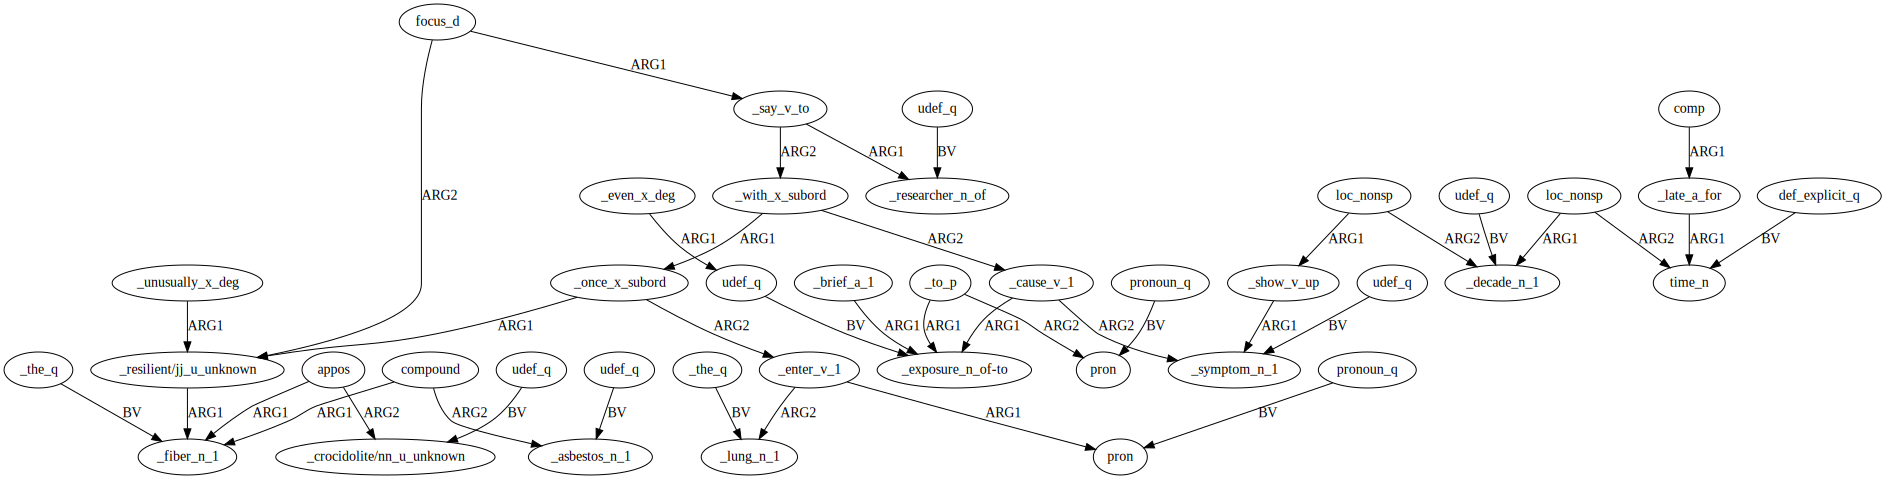

In [84]:
eds2graph(te)